## Load Data

Preparation of data takes place in separate scripts. In the following, the aggregated data frames are read in from parquet files.

For this template script to work, the data frames must have the expected structure:

In [ ]:
# Expected data frame structure (empty example data frame)
import pandas as pd
expected_df_structure = pd.DataFrame(columns=[
    'ID', 'PARAMETER', 'RUNTIME', 'MODEL', 'SCALED', 'LIBRARY', 'ENDOGENOUS', 'EXOGENOUS', 'FIRST_FORECAST', 'ALARM_TYPE', 
    'TP', 'FN', 'FP', 'TN', 
    'FPR', 'TPR', 'FNR', 'TNR', 'ACC', 'F1S', 
    'N_CHUNKS', 'N_ITERATIONS'])

In [ ]:
import pandas as pd
import pyarrow as pa
arimax_overview = pd.read_parquet('../data/arima-data_week14/arima-x_forecast_overview_first2000_2021-07-20T13-09-54.parquet', engine='pyarrow')
# rnn_overview = pd.read_parquet('../data/INSERT.parquet', engine='pyarrow')

In [6]:
# Sort by ID, but sort alarm type low in front of high
arimax_overview['TEMPORARY_SORTING_COLUMN'] = arimax_overview.ID.replace( ['_H', '_L'], ['', ''], regex=True)
arimax_overview = arimax_overview.sort_values(by=['TEMPORARY_SORTING_COLUMN', 'ALARM_TYPE'], ascending = [True, False]).drop(['TEMPORARY_SORTING_COLUMN'], axis = 1).reset_index(drop=True)
display(arimax_overview)

,ID,PARAMETER,RUNTIME,MODEL,LIBRARY,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,TP,...,FP,TN,FPR,TPR,FNR,TNR,ACC,F1S,N_CHUNKS,N_ITERATIONS
0,BP_A_01_12_d_L,BP,None,ARIMA,darts,Median,n/a,12,Low,30,...,49,4639,0.0105,0.2027,0.7973,0.9895,0.9655,0.2643,405.0,4836.0
1,BP_A_01_12_d_H,BP,None,ARIMA,darts,Median,n/a,12,High,150,...,103,4451,0.0226,0.5319,0.4681,0.9774,0.9514,0.5607,405.0,4836.0
2,BP_A_01_12_p_L,BP,None,ARIMA,pmdarima,Median,n/a,12,Low,30,...,49,4639,0.0105,0.2027,0.7973,0.9895,0.9655,0.2643,405.0,4836.0
3,BP_A_01_12_p_H,BP,None,ARIMA,pmdarima,Median,n/a,12,High,150,...,103,4451,0.0226,0.5319,0.4681,0.9774,0.9514,0.5607,405.0,4836.0
4,BP_A_01_30_d_L,BP,None,ARIMA,darts,Median,n/a,30,Low,2,...,6,1125,0.0053,0.0588,0.9412,0.9947,0.9674,0.0952,88.0,1165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,O2_A_03_12_p_H,O2,None,ARIMAX,pmdarima,Max,Median,12,High,36,...,304,25557,0.0118,1.0000,0.0000,0.9882,0.9883,0.1915,923.0,25897.0
68,O2_A_03_30_d_L,O2,None,ARIMAX,darts,Min,Median,30,Low,55,...,250,13689,0.0179,0.1910,0.8090,0.9821,0.9661,0.1855,426.0,14227.0
69,O2_A_03_30_d_H,O2,None,ARIMAX,darts,Max,Median,30,High,12,...,156,14059,0.0110,1.0000,0.0000,0.9890,0.9890,0.1333,426.0,14227.0
70,O2_A_03_30_p_L,O2,None,ARIMAX,pmdarima,Min,Median,30,Low,55,...,250,13689,0.0179,0.1910,0.8090,0.9821,0.9661,0.1855,426.0,14227.0


In [8]:
# Model Overview (removes parameters, focuses on model configurations)
arimax_overview.replace(['HR_', 'BP_', 'O2_'], ['', '', ''], regex=True)[
    ['ID', 'MODEL', 'LIBRARY', 'ENDOGENOUS', 'EXOGENOUS', 'FIRST_FORECAST', 'ALARM_TYPE']
    ].drop_duplicates().reset_index(drop=True)

,ID,MODEL,LIBRARY,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE
0,A_01_12_d_L,ARIMA,darts,Median,n/a,12,Low
1,A_01_12_d_H,ARIMA,darts,Median,n/a,12,High
2,A_01_12_p_L,ARIMA,pmdarima,Median,n/a,12,Low
3,A_01_12_p_H,ARIMA,pmdarima,Median,n/a,12,High
4,A_01_30_d_L,ARIMA,darts,Median,n/a,30,Low
5,A_01_30_d_H,ARIMA,darts,Median,n/a,30,High
6,A_01_30_p_L,ARIMA,pmdarima,Median,n/a,30,Low
7,A_01_30_p_H,ARIMA,pmdarima,Median,n/a,30,High
8,A_02_12_d_L,ARIMA,darts,Min,n/a,12,Low
9,A_02_12_d_H,ARIMA,darts,Max,n/a,12,High


In [40]:
# Results for selected parameter
selected_parameter = 'HR'

results_selected_parameter = arimax_overview[arimax_overview.PARAMETER == selected_parameter][
    ['ID', 'ALARM_TYPE', 'TP', 'FN', 'FP', 'TN', 'FPR', 'TPR', 'FNR', 'TNR', 'ACC', 'F1S', 'N_CHUNKS', 'N_ITERATIONS']
    ].reset_index(drop=True)

# Print best FPR & F1S - Multiple lines are displayed if there are identical scores (e.g. darts and pmdarima)
print("Best (lowest) FPR - Low Alarm:")
print(results_selected_parameter[results_selected_parameter.FPR == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'Low'].FPR.min()][['ID','FPR']])
print("----------")
print("Best (lowest) FPR - High Alarm:")
print(results_selected_parameter[results_selected_parameter.FPR == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'High'].FPR.min()][['ID','FPR']])
print("----------")
print("Best (highest) F1S - Low Alarm:")
print(results_selected_parameter[results_selected_parameter.F1S == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'Low'].F1S.max()][['ID','F1S']])
print("----------")
print("Best (highest) F1S - High Alarm:")
print(results_selected_parameter[results_selected_parameter.F1S == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'High'].F1S.max()][['ID','F1S']])
print("----------")

Best (lowest) FPR - Low Alarm:
               ID     FPR
4  HR_A_01_30_d_L  0.0055
6  HR_A_01_30_p_L  0.0055
----------
Best (lowest) FPR - High Alarm:
               ID     FPR
5  HR_A_01_30_d_H  0.0041
7  HR_A_01_30_p_H  0.0041
----------
Best (highest) F1S - Low Alarm:
                ID   F1S
12  HR_A_02_30_d_L  0.44
14  HR_A_02_30_p_L  0.44
----------
Best (highest) F1S - High Alarm:
               ID     F1S
5  HR_A_01_30_d_H  0.4064
7  HR_A_01_30_p_H  0.4064
----------


## Model Comparison FPR & F1S

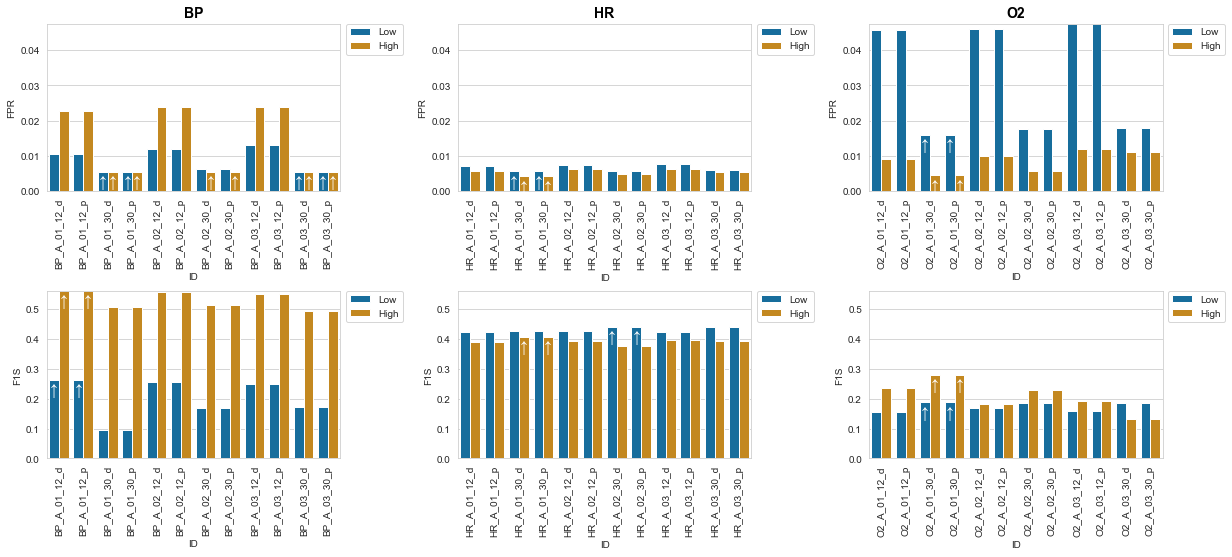

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

overview = arimax_overview
# overview = arimax_overview[arimax_overview.LIBRARY == 'darts']

sns.set_style("whitegrid")

plotdata = overview.replace( ['_H', '_L'], ['', ''], regex=True)

fig, axs = plt.subplots(
    2,
    3,
    figsize = (20, 8),
    dpi = 72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

fpr_ylimits = [0,max(overview.FPR)]
f1s_ylimits = [0,max(overview.F1S)]

for i, parameter in enumerate(['BP', 'HR', 'O2']):

    plot1 = sns.barplot(
        ax = axs[0,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='FPR',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[0,i].set_title(str(parameter), fontweight='bold', color= 'black', fontsize=14)
    axs[0,i].set_ylim(fpr_ylimits)
    axs[0,i].tick_params(axis="x", rotation=90)
    axs[0,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_fpr_low = plotdata[plotdata.FPR == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].FPR.min()]['FPR'].unique()
    best_fpr_high = plotdata[plotdata.FPR == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].FPR.min()]['FPR'].unique()

    for bar in plot1.patches:
        if bar.get_height() == best_fpr_low or bar.get_height() == best_fpr_high :
            plot1.annotate("↑",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='center', size=15, xytext=(0, -10), color='white', fontsize=16,
            textcoords='offset points')

    plot2 = sns.barplot(
        ax = axs[1,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='F1S',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[1,i].set_ylim(f1s_ylimits)
    axs[1,i].tick_params(axis="x", rotation=90)
    axs[1,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_f1s_low = plotdata[plotdata.F1S == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].F1S.max()]['F1S'].unique()
    best_f1s_high = plotdata[plotdata.F1S == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].F1S.max()]['F1S'].unique()

    for bar in plot2.patches:
        if bar.get_height() == best_f1s_low or bar.get_height() == best_f1s_high :
            plot2.annotate("↑",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='center', size=15, xytext=(0, -10), color='white', fontsize=16,
            textcoords='offset points')

plt.show(fig)

## darts vs pmdarima: FPR & F1S

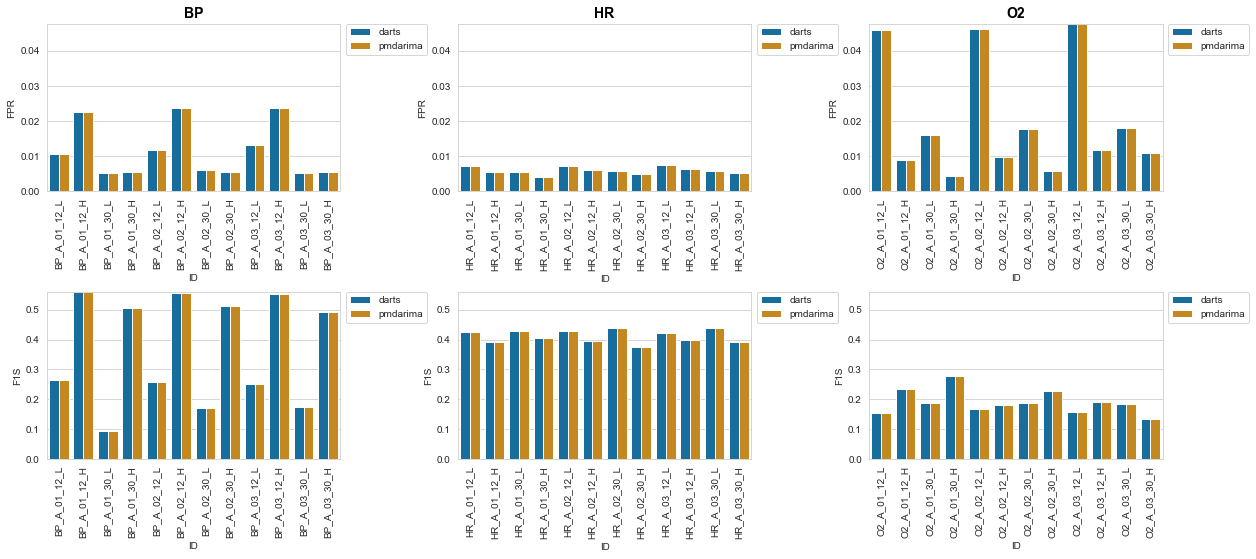

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

overview = arimax_overview

sns.set_style("whitegrid")

plotdata = overview.replace( ['_d', '_p'], ['', ''], regex=True)

fig, axs = plt.subplots(
    2,
    3,
    figsize = (20, 8),
    dpi = 72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

fpr_ylimits = [0,max(overview.FPR)]
f1s_ylimits = [0,max(overview.F1S)]

for i, parameter in enumerate(['BP', 'HR', 'O2']):

    plot1 = sns.barplot(
        ax = axs[0,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='FPR',
        hue='LIBRARY',
        palette = sns.color_palette("colorblind"),
        ci=None)
    axs[0,i].set_title(str(parameter), fontweight='bold', color= 'black', fontsize=14)
    axs[0,i].set_ylim(fpr_ylimits)
    axs[0,i].tick_params(axis="x", rotation=90)
    axs[0,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plot2 = sns.barplot(
        ax = axs[1,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='F1S',
        hue='LIBRARY',
        palette = sns.color_palette("colorblind"),
        ci=None)
    axs[1,i].set_ylim(f1s_ylimits)
    axs[1,i].tick_params(axis="x", rotation=90)
    axs[1,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show(fig)

## darts vs pmdarima: RUNTIME

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# overview = arimax_overview

# sns.set_style("whitegrid")

# plotdata = overview.replace( ['_d', '_p'], ['', ''], regex=True)

# fig, axs = plt.subplots(
#     1,
#     3,
#     figsize = (20, 4),
#     dpi = 72
#     )
# fig.subplots_adjust(hspace = 0.8)

# runtime_ylimits = [0,max(overview[overview.RUNTIME.notnull()]['RUNTIME'])]

# for i, parameter in enumerate(['BP', 'HR', 'O2']):

#     sns.barplot(
#         ax = axs[i],
#         data = plotdata[plotdata.PARAMETER == parameter],
#         x='ID',
#         y='RUNTIME',
#         hue='LIBRARY',
#         palette = sns.color_palette("colorblind"),
#         ci=None)
#     axs[i].set_title(str(parameter), fontweight='bold', color= 'black', fontsize=14)
#     axs[i].set_ylim(runtime_ylimits)
#     axs[i].tick_params(axis="x", rotation=90)

# plt.show(fig)

## FIRST FORECAST 12 vs 30: FPR & F1S

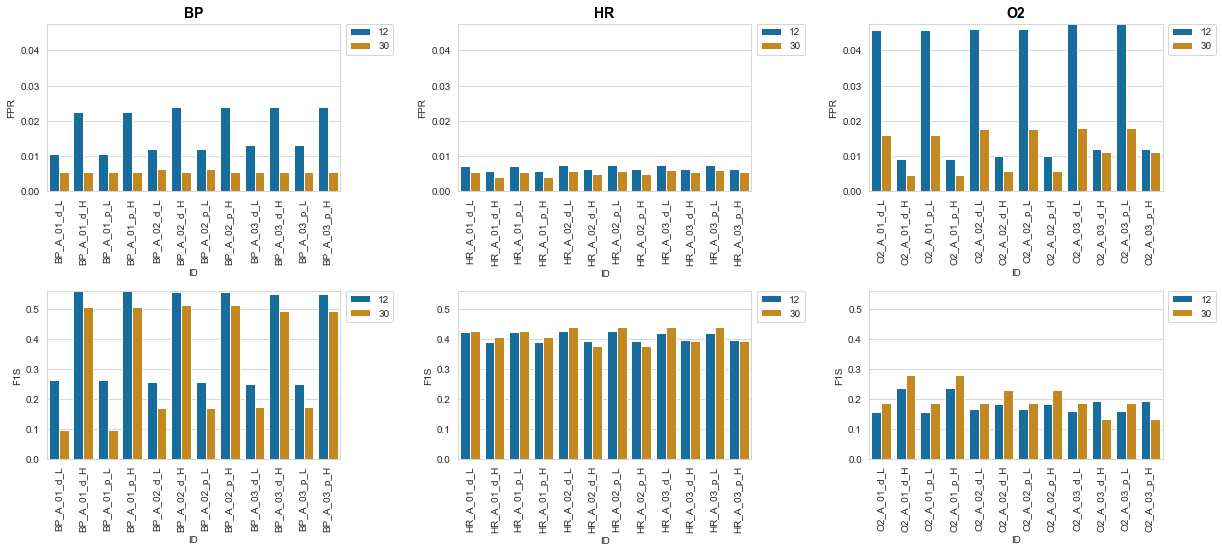

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

overview = arimax_overview
# overview = arimax_overview[arimax_overview.LIBRARY == 'darts']

sns.set_style("whitegrid")

plotdata = overview.replace( ['_12', '_30'], ['', ''], regex=True)

fig, axs = plt.subplots(
    2,
    3,
    figsize = (20, 8),
    dpi = 72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

fpr_ylimits = [0,max(overview.FPR)]
f1s_ylimits = [0,max(overview.F1S)]

for i, parameter in enumerate(['BP', 'HR', 'O2']):

    plot1 = sns.barplot(
        ax = axs[0,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='FPR',
        hue='FIRST_FORECAST',
        palette = sns.color_palette("colorblind"),
        ci=None)
    axs[0,i].set_title(str(parameter), fontweight='bold', color= 'black', fontsize=14)
    axs[0,i].set_ylim(fpr_ylimits)
    axs[0,i].tick_params(axis="x", rotation=90)
    axs[0,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plot2 = sns.barplot(
        ax = axs[1,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='F1S',
        hue='FIRST_FORECAST',
        palette = sns.color_palette("colorblind"),
        ci=None)
    axs[1,i].set_ylim(f1s_ylimits)
    axs[1,i].tick_params(axis="x", rotation=90)
    axs[1,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show(fig)

## Confusion Matrix Stacked Plot

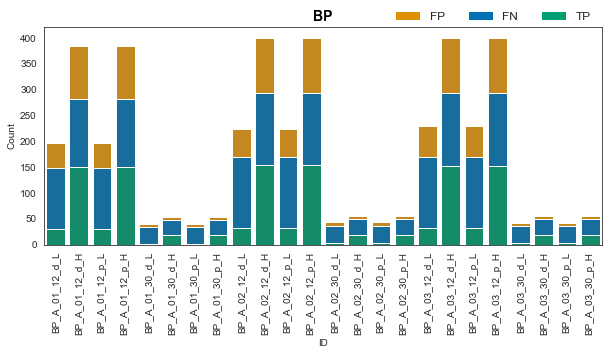

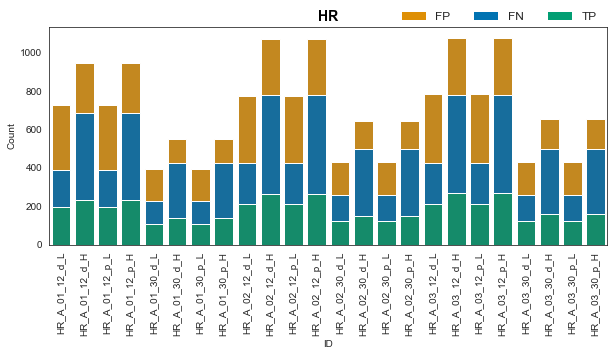

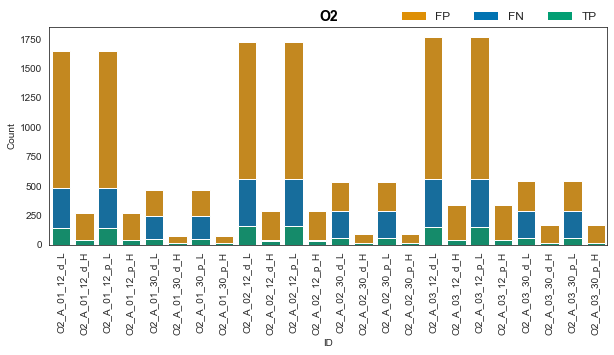

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for i, parameter in enumerate(['BP', 'HR', 'O2']):

    sns.set_style("white")
    sns.set_context({"figure.figsize": (10, 4)})

    plotdata = overview[overview.PARAMETER == parameter][['ID','TP','FN','FP']]
    plotdata['Series1'] = plotdata.TP + plotdata.FN + plotdata.FP
    plotdata['Series2'] = plotdata.TP + plotdata.FN
    plotdata['Series3'] = plotdata.TP

    fp = sns.barplot(
        data=plotdata,
        x='ID',
        y='Series1',
        color = sns.color_palette("colorblind")[1],
        ci=None).tick_params(axis="x", rotation=90)

    fn = sns.barplot(
        data=plotdata,
        x='ID',
        y='Series2',
        color = sns.color_palette("colorblind")[0],
        ci=None).set_title(str(parameter), fontweight='bold', color= 'black', fontsize=14)
    
    tp = sns.barplot(
        data=plotdata,
        x='ID',
        y='Series3',
        color = sns.color_palette("colorblind")[2],
        ci=None).set(ylabel="Count")
    
    leg_fp = plt.Rectangle((0,0),1,1,fc=sns.color_palette("colorblind")[1], edgecolor = 'none')
    leg_fn = plt.Rectangle((0,0),1,1,fc=sns.color_palette("colorblind")[0], edgecolor = 'none')
    lef_tp = plt.Rectangle((0,0),1,1,fc=sns.color_palette("colorblind")[2], edgecolor = 'none')
    l = plt.legend([leg_fp, leg_fn, lef_tp], ['FP', 'FN', 'TP'], loc=1, ncol = 3, prop={'size':12}, bbox_to_anchor=(1, 1.12))
    l.draw_frame(False)

    plt.show()


In [100]:
arimax_overview['TP_FP_RATIO'] = round(arimax_overview.TP / arimax_overview.FP, 2)

display(arimax_overview[arimax_overview.PARAMETER == 'BP'][['ID','TP','FN','FP', 'TN', 'TP_FP_RATIO']].reset_index(drop=True))
display(arimax_overview[arimax_overview.PARAMETER == 'HR'][['ID','TP','FN','FP', 'TN', 'TP_FP_RATIO']].reset_index(drop=True))
display(arimax_overview[arimax_overview.PARAMETER == 'O2'][['ID','TP','FN','FP', 'TN', 'TP_FP_RATIO']].reset_index(drop=True))

,ID,TP,FN,FP,TN,TP_FP_RATIO
0,BP_A_01_12_d_L,30,118,49,4639,0.61
1,BP_A_01_12_d_H,150,132,103,4451,1.46
2,BP_A_01_12_p_L,30,118,49,4639,0.61
3,BP_A_01_12_p_H,150,132,103,4451,1.46
4,BP_A_01_30_d_L,2,32,6,1125,0.33
5,BP_A_01_30_d_H,18,29,6,1112,3.00
6,BP_A_01_30_p_L,2,32,6,1125,0.33
7,BP_A_01_30_p_H,18,29,6,1112,3.00
8,BP_A_02_12_d_L,33,136,55,4612,0.60
9,BP_A_02_12_d_H,155,138,108,4435,1.44


,ID,TP,FN,FP,TN,TP_FP_RATIO
0,HR_A_01_12_d_L,197,192,341,47614,0.58
1,HR_A_01_12_d_H,231,453,265,47395,0.87
2,HR_A_01_12_p_L,197,192,341,47614,0.58
3,HR_A_01_12_p_H,231,453,265,47395,0.87
4,HR_A_01_30_d_L,108,122,166,29829,0.65
5,HR_A_01_30_d_H,140,287,122,29676,1.15
6,HR_A_01_30_p_L,108,122,166,29829,0.65
7,HR_A_01_30_p_H,140,287,122,29676,1.15
8,HR_A_02_12_d_L,211,215,348,47567,0.61
9,HR_A_02_12_d_H,264,514,296,47267,0.89


,ID,TP,FN,FP,TN,TP_FP_RATIO
0,O2_A_01_12_d_L,138,343,1163,24253,0.12
1,O2_A_01_12_d_H,36,0,234,25627,0.15
2,O2_A_01_12_p_L,138,343,1163,24253,0.12
3,O2_A_01_12_p_H,36,0,234,25627,0.15
4,O2_A_01_30_d_L,48,193,223,13763,0.22
5,O2_A_01_30_d_H,12,0,62,14153,0.19
6,O2_A_01_30_p_L,48,193,223,13763,0.22
7,O2_A_01_30_p_H,12,0,62,14153,0.19
8,O2_A_02_12_d_L,158,400,1169,24168,0.14
9,O2_A_02_12_d_H,29,7,253,25606,0.11
